In [1]:
import pandas as pd

# load and clean playerStats and teamStats 
player_data = pd.read_csv("playerStats.csv")
team_data = pd.read_csv("teamStats.csv")

# clean dataframe from lable rows
filtered_player_df = player_data[player_data['FGM'] != 'FGM']


# convert columns to correct types for numeric opperations
dfn = filtered_player_df.convert_dtypes()

dfn[["SEASON_ID", "Player_ID", "Game_ID", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT", "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "PLUS_MINUS"]] = dfn[["SEASON_ID", "Player_ID", "Game_ID", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT", "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "PLUS_MINUS"]].apply(pd.to_numeric)
player_data = dfn

# encode win/loss
# win == 1
# loss == 0
player_data['WL'] = player_data['WL'].map({'W': 1, 'L': 0})



In [2]:
# player_data holds player stats in correct type format
# now we can explore how these numbers relate and generate hypotheses
GAFFORD_ID = 1629655
WASHINGTON_ID = 1629023
LUKA_ID = 1629029
KYRIE_ID = 202681
WILLIAMS_ID = 1629684
LIVELY_ID = 1641726
POWELL_ID = 203939
JONESJR_ID = 1627884
KLEBER_ID = 1628467
GREEN_ID = 1630182
THJ_ID = 203501



kyrie_df = player_data[player_data['Player_ID'] == LUKA_ID]
print(kyrie_df.corr())


              Unnamed: 0  SEASON_ID  Player_ID   Game_ID        WL       MIN  \
Unnamed: 0  1.000000e+00        NaN        NaN -0.934731 -0.184466  0.408996   
SEASON_ID            NaN        NaN        NaN       NaN       NaN       NaN   
Player_ID            NaN        NaN        NaN       NaN       NaN       NaN   
Game_ID    -9.347305e-01        NaN        NaN  1.000000  0.130518 -0.427622   
WL         -1.844662e-01        NaN        NaN  0.130518  1.000000 -0.199247   
MIN         4.089959e-01        NaN        NaN -0.427622 -0.199247  1.000000   
FGM        -6.339729e-02        NaN        NaN  0.090744  0.462646 -0.218646   
FGA         4.725055e-01        NaN        NaN -0.294915  0.057469  0.011089   
FG_PCT     -3.721029e-01        NaN        NaN  0.269316  0.521435 -0.179468   
FG3M       -4.221183e-01        NaN        NaN  0.475899  0.366520 -0.148049   
FG3A        2.028630e-01        NaN        NaN -0.025778 -0.009164  0.099308   
FG3_PCT    -5.259535e-01        NaN     

/var/folders/35/l9gpx2xs2m3cbhhnbkchpc7m0000gn/T/ipykernel_53041/2547838161.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(kyrie_df.corr())


In [53]:
# Lets see if we can build a logistic Regression classifier
# to predict if a team wins based on several team statistcs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib as plt

# log regression
team_data = pd.read_csv("teamStats.csv")


team_data['WL'] = team_data['WL'].map({'W': 1, 'L': 0})

# Select feature columns with minimial covariance
feature_cols = ['FG_PCT', 'STL', 'BLK', 'PTS','AST','DREB']
X = team_data[feature_cols] 
y = team_data.WL 

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



array([[0, 1],
       [1, 3]])

[[83 19]
 [26 80]]
              precision    recall  f1-score   support

        loss       0.76      0.81      0.79       102
        wins       0.81      0.75      0.78       106

    accuracy                           0.78       208
   macro avg       0.78      0.78      0.78       208
weighted avg       0.79      0.78      0.78       208



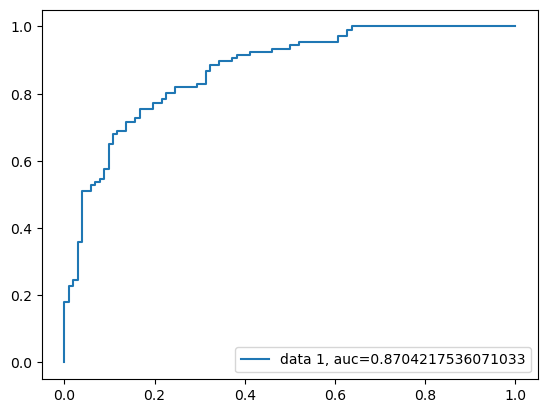

In [91]:
# Can we do better after normalizing the data?

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# log regression
playoff_data = pd.read_csv("bigStats/playoffs.csv")
playoff_data = playoff_data[playoff_data['FGM'] != 'FGM']

playoff_data['WL'] = playoff_data['WL'].map({'W': 1, 'L': 0})

# Convert object columns to numeric
for column in playoff_data.select_dtypes(include='object').columns:
    playoff_data[column] = pd.to_numeric(playoff_data[column], errors='coerce')


# Identify rows with any null values
null_rows = playoff_data[playoff_data.isnull().any(axis=1)]


feature_cols = ['FG_PCT', 'STL', 'BLK', 'PTS','AST','DREB']
X = playoff_data[feature_cols] # Features
y = playoff_data.WL 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# normalize the features
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

X_test_minmax = min_max_scaler.transform(X_test)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

from sklearn.metrics import classification_report
target_names = ['loss', 'wins']
print(classification_report(y_test, y_pred, target_names=target_names))



y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

[[85 17]
 [21 85]]
              precision    recall  f1-score   support

        loss       0.80      0.83      0.82       102
        wins       0.83      0.80      0.82       106

    accuracy                           0.82       208
   macro avg       0.82      0.82      0.82       208
weighted avg       0.82      0.82      0.82       208



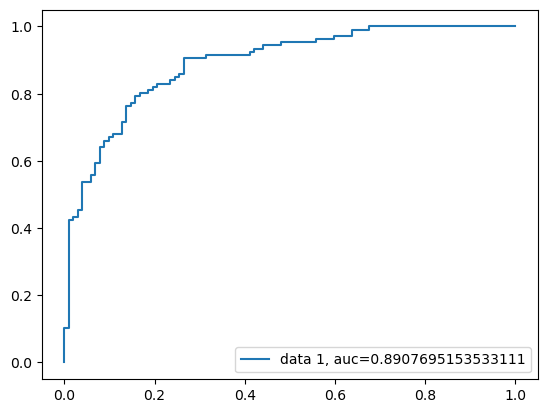

0.7980769230769231


In [102]:
# fit the model with normalized data
logreg.fit(X_train_minmax, y_train)

y_pred = logreg.predict(X_test_minmax)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

from sklearn.metrics import classification_report
target_names = ['loss', 'wins']
print(classification_report(y_test, y_pred, target_names=target_names))



y_pred_proba = logreg.predict_proba(X_test_minmax)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

X_minmax = min_max_scaler.transform(X)

print(logreg.score(X_minmax,y))

In [105]:
# what does it predict for the mavs and the celtics
# given the performance of both teams, which team is predicted to win with a higher probability 

MAVS_ID = 1610612742
CELTICS_ID = 1610612738
SEASON_2024_ID = 42023

mavs_2024_data = playoff_data[(playoff_data['TEAM_ID'] == MAVS_ID) & (playoff_data['SEASON_ID'] == SEASON_2024_ID)]
celtics_2024_data = playoff_data[(playoff_data['TEAM_ID'] == CELTICS_ID) & (playoff_data['SEASON_ID'] == SEASON_2024_ID)]


# calculate the average of each column
mavs_column_averages = mavs_2024_data.mean()
celtics_column_averages = celtics_2024_data.mean()

# convert the column to dataframe
mavs_2024_data = pd.DataFrame(mavs_column_averages)
celtics_2024_data = pd.DataFrame(celtics_column_averages)

mavs_2024_data = mavs_2024_data.transpose()
celtics_2024_data = celtics_2024_data.transpose()

# select feature columns
mavs_2024_data = mavs_2024_data[feature_cols]
celtics_2024_data = celtics_2024_data[feature_cols]

# normalize columns before feeding into model
mavs_2024_data = min_max_scaler.transform(mavs_2024_data)
celtics_2024_data = min_max_scaler.transform(celtics_2024_data)

# predict probabilities 
mavs_prob = logreg.predict_proba(mavs_2024_data)
celtics_prob = logreg.predict_proba(celtics_2024_data)
print("mavs probabilty loss, win:")
print(mavs_prob)
print("celtics probabilty loss, win:")
print(celtics_prob)


mavs probabilty loss, win:
[[0.50953352 0.49046648]]
celtics probabilty loss, win:
[[0.39876495 0.60123505]]
